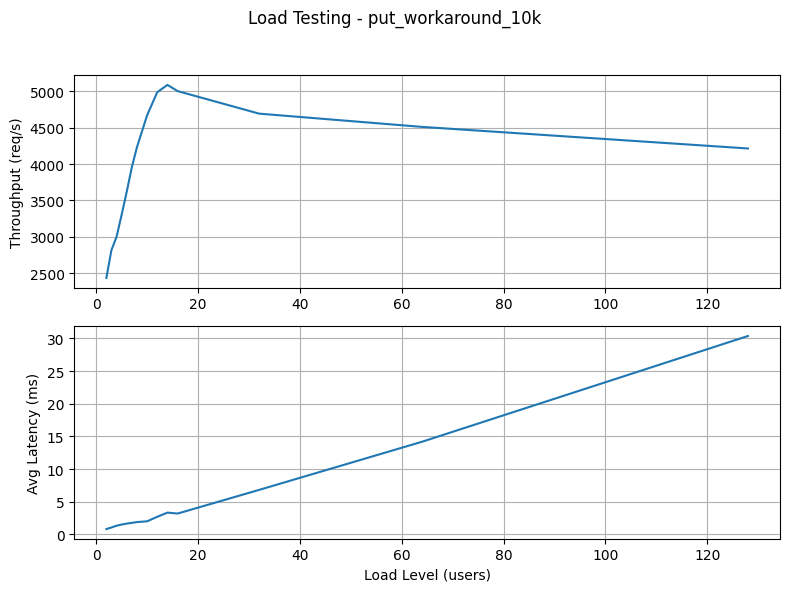

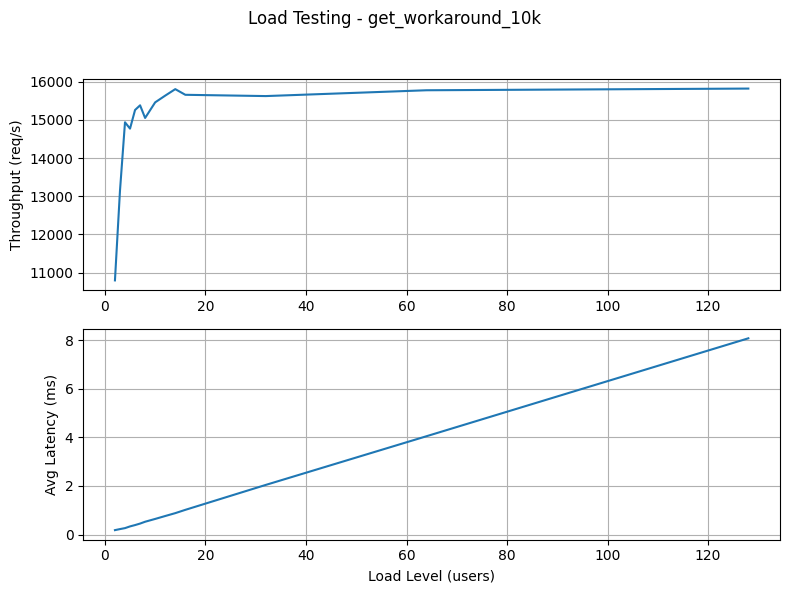

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "data.xlsx"

# Sheets to process
sheets = ["put_workaround_10k", "get_workaround_10k"]

for sheet in sheets:
    # Read the sheet
    df = pd.read_excel(file_path, sheet_name=sheet)

    # Extract required columns
    load_levels = df[df.columns[0]]  # assumes first column is load/users
    throughput = df["Throughput (req/s)"]
    latency = df["Avg latency (ms)"]

    # Create plot (2 stacked subplots)
    fig, ax = plt.subplots(2, 1, figsize=(8, 6))
    fig.suptitle(f"Load Testing - {sheet}")

    # Plot throughput
    ax[0].plot(load_levels, throughput)
    ax[0].set_ylabel("Throughput (req/s)")

    # Plot latency
    ax[1].plot(load_levels, latency)
    ax[1].set_ylabel("Avg Latency (ms)")
    ax[1].set_xlabel("Load Level (users)")

    # Show grid for readability
    for a in ax:
        a.grid(True)

    # Display the figure
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


## Do not use!

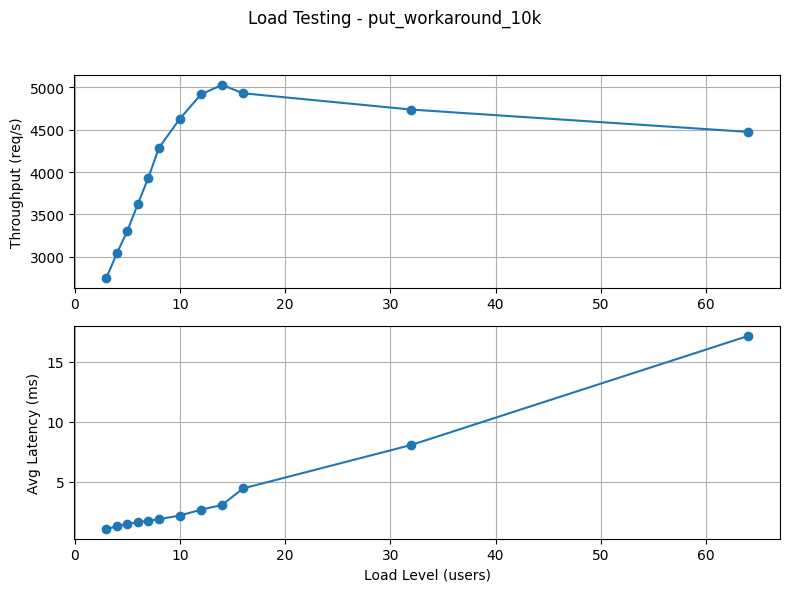

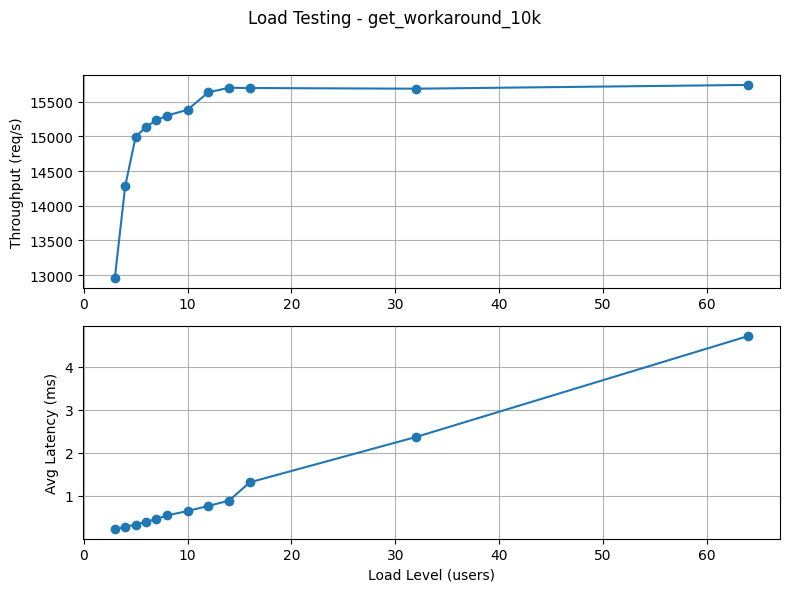

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "data.xlsx"

# Sheets to process
sheets = ["put_workaround_10k", "get_workaround_10k"]

# Smoothing window (tune this: 3, 5, or 7 depending how smooth you want)
smooth_window = 3

for sheet in sheets:
    # Read the sheet
    df = pd.read_excel(file_path, sheet_name=sheet)

    # Extract required columns
    load_levels = df[df.columns[0]]  # assumes first column is load/users
    throughput = df["Throughput (req/s)"].rolling(window=smooth_window, center=True).mean()
    latency = df["Avg latency (ms)"].rolling(window=smooth_window, center=True).mean()

    # Create plot (2 stacked subplots)
    fig, ax = plt.subplots(2, 1, figsize=(8, 6))
    fig.suptitle(f"Load Testing - {sheet}")

    # Plot (with markers so we still see actual data points)
    ax[0].plot(load_levels, throughput, marker="o")
    ax[0].set_ylabel("Throughput (req/s)")

    ax[1].plot(load_levels, latency, marker="o")
    ax[1].set_ylabel("Avg Latency (ms)")
    ax[1].set_xlabel("Load Level (users)")

    # Grid for readability
    for a in ax:
        a.grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
